# Hyperbolic trajectory
----

Import modules and functions

In [6]:
import numpy as np
from numpy import cos, sin, cosh, sinh, tanh, array,pi, exp
from numpy.linalg import norm,solve
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.linalg
from System import MakeSystem, FindHyperbolicTrajectory, MakeLinearisedSolution
# %matplotlib qt

Set parameters of the system and find the hyperbolic trajectory, as well as the linearised hyperbolic trajectory

# Stable manifold data collection
---

Import functions to collect and process stable manifold data

In [8]:
from StableManifoldTrajectories import FindStableTrajectory,FindUnstableTrajectory
import scipy.io
import scipy.interpolate
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import Rbf
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import interp1d


In [19]:
k = 3
SaveFile=f'k={k} data/'
ForcingParameters = array([.1,.7,-.15,2])
f,lminus,lplus,G,A = MakeSystem(k,ForcingParameters) 

XQ = MakeLinearisedSolution(ForcingParameters,lplus,lminus)
tmin,tmax = -10,10

N = 401
Xhyp,t,X0 = FindHyperbolicTrajectory(f,lminus,lplus,XQ,tmin,tmax,N,A)

 after 7 iterations an estimate with error of F =2.4505293923774943e-11 and delta = 5.391676899904599e-09was produced


Produce plots comparing the hyperbolic trajectory with the linearised system.

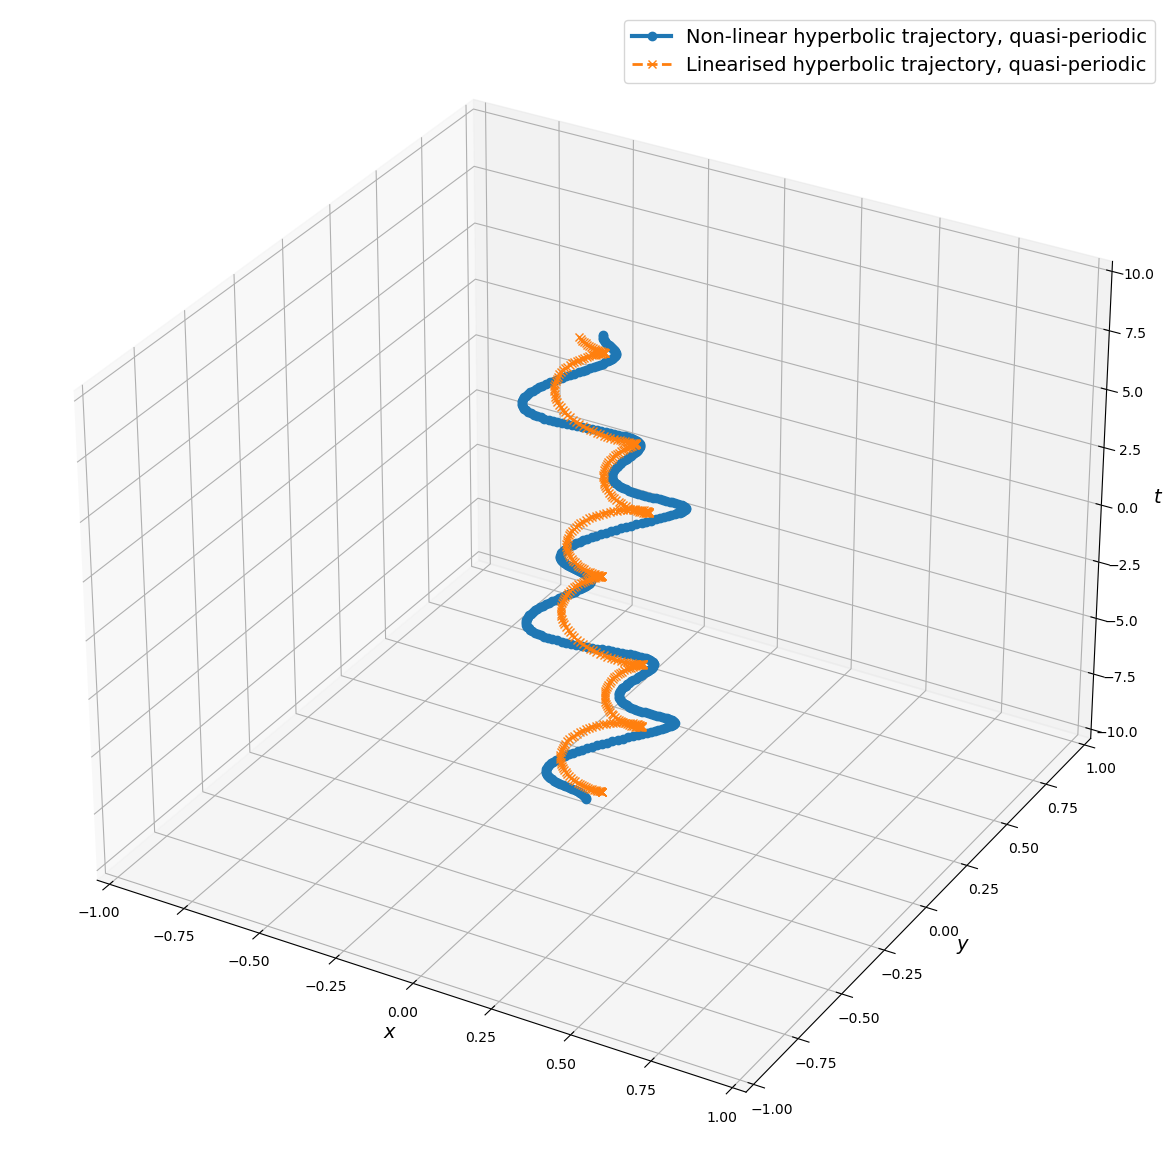

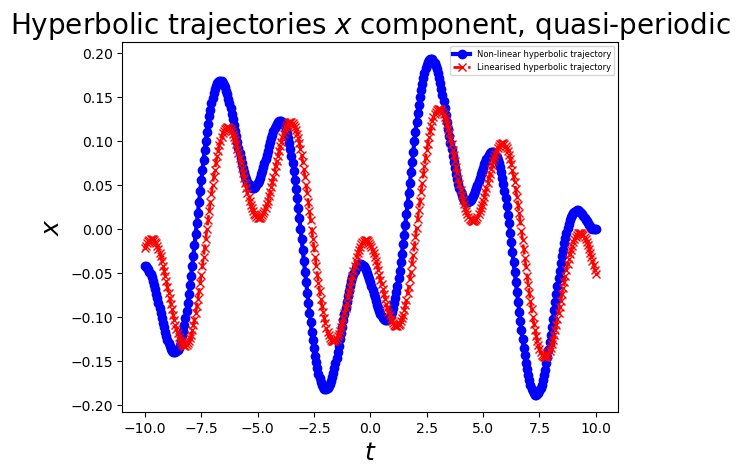

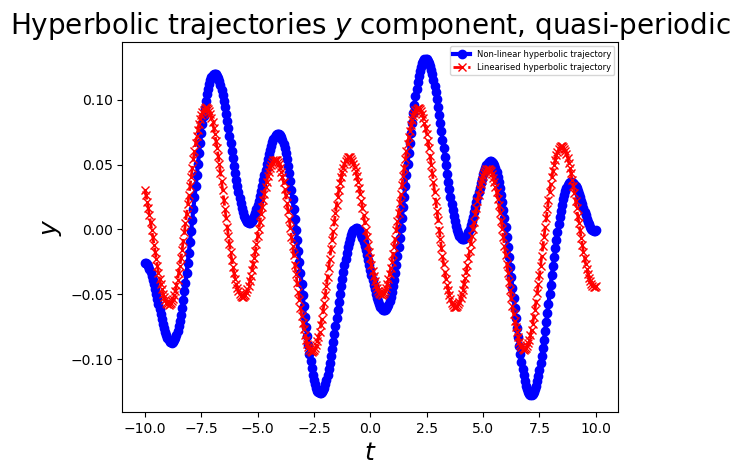

In [103]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

ax.plot(Xhyp[:,0], Xhyp[:,1], t,linestyle='-',  linewidth=3, marker='o', label="Non-linear hyperbolic trajectory, quasi-periodic")
ax.plot( X0[:,0], X0[:,1],t,linestyle='--', linewidth=2, marker='x', label="Linearised hyperbolic trajectory, quasi-periodic")
plt.legend(fontsize=14)
ax.set_xlabel("$x$", fontsize=14)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
ax.set_ylabel("$y$", fontsize=14)
ax.set_zlabel("$t$", fontsize=14)
plt.show()

plt.plot(t, Xhyp[:,0], color='blue', linestyle='-',  linewidth=3, marker='o', label="Non-linear hyperbolic trajectory")
plt.plot(t, X0[:,0], color='red',  linestyle='--', linewidth=2, marker='x', label="Linearised hyperbolic trajectory")
plt.title("Hyperbolic trajectories $x$ component, quasi-periodic", fontsize=20)
plt.xlabel("$t$", fontsize=18)
plt.ylabel("$x$", fontsize=18)
plt.legend(fontsize=6)
plt.show()
plt.plot(t, Xhyp[:,1], color='blue', linestyle='-',  linewidth=3, marker='o', label="Non-linear hyperbolic trajectory")
plt.plot(t, X0[:,1], color='red',  linestyle='--', linewidth=2, marker='x', label="Linearised hyperbolic trajectory")
plt.title("Hyperbolic trajectories $y$ component, quasi-periodic", fontsize=20)
plt.xlabel("$t$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.legend(fontsize=6)
plt.show()

In [25]:
stableCoord = np.linspace(-20,20,100)
unstableCoord =np.linspace(-20,20,100)
tindices = np.array([int(N//3),int(N//2),int(2*N//3)])
ySMvals = np.zeros((len(stableCoord),len(tindices)))
xSMvals = np.zeros((len(stableCoord),len(tindices)))
yUMvals = np.zeros((len(unstableCoord),len(tindices)))
xUMvals = np.zeros((len(unstableCoord),len(tindices)))


count =0
l=0
for J in tindices:
    for i in range(0,len(stableCoord)):
        p = stableCoord[i]
        X,tnew,X0,Jnew = FindStableTrajectory(f,lminus,lplus,tmin,tmax,N,p,J,Xhyp,A)
        ySMvals[i,l] = X[Jnew][1]   # output of function applied to (trange[J],P[i])
        xSMvals[i,l] = X[Jnew][0]   # output of function applied to (trange[J],P[i])
        count +=1 
        if int(100*count/(len(tindices)*len(stableCoord)))%5 ==0:
            print(str(int(100*count/(len(tindices)*len(stableCoord)))) + "% complete")
    l+=1
            
count =0
l=0
for J in tindices:
    for i in range(0,len(unstableCoord)):
        q = unstableCoord[i]
        X,tnew,X0,Jnew = FindUnstableTrajectory(f,lminus,lplus,tmin,tmax,N,q,J,Xhyp,A)
        yUMvals[i,l] = X[Jnew][1]   # output of function applied to (trange[J],P[i])
        xUMvals[i,l] = X[Jnew][0]   # output of function applied to (trange[J],P[i])
        count +=1 
        if int(100*count/(len(tindices)*len(unstableCoord)))%5 ==0:
            print(str(int(100*count/(len(tindices)*len(unstableCoord)))) + "% complete")
    l+=1
            
            
            

0% complete
0% complete
5% complete
5% complete
5% complete
10% complete
10% complete
10% complete
15% complete
15% complete
15% complete
20% complete
20% complete
20% complete
25% complete
25% complete
25% complete
30% complete
30% complete
30% complete
35% complete
35% complete
35% complete
40% complete
40% complete
40% complete
45% complete
45% complete
45% complete
50% complete
50% complete
50% complete
55% complete
55% complete
55% complete
60% complete
60% complete
60% complete
65% complete
65% complete
65% complete
70% complete
70% complete
70% complete
75% complete
75% complete
75% complete
80% complete
80% complete
80% complete
85% complete
85% complete
85% complete
90% complete
90% complete
90% complete
95% complete
95% complete
95% complete
100% complete
0% complete
0% complete
5% complete
5% complete
5% complete
10% complete
10% complete
10% complete
15% complete
15% complete
15% complete
20% complete
20% complete
20% complete
25% complete
25% complete
25% complete
30% comp

xSM[i,j] stores the stable manifold x position corresponding to (stableCoord[i],t[tindices[l]])

In [31]:
np.save("tindices.npy",tindices)
np.save("t.npy",t)
np.save("Xhyp.npy",Xhyp)
np.save("k.npy", k)
np.save("ForcingParameters.npy",ForcingParameters)

np.save("stableCoord.npy",stableCoord)
np.save("ySMvals.npy",ySMvals)
np.save("xSMvals.npy",xSMvals)


np.save("unstableCoord.npy",unstableCoord)
np.save("yUMvals.npy",yUMvals)
np.save("xUMvals.npy",xUMvals)



## Importing already computed data


In [20]:
tindices=np.load(SaveFile+"tindices.npy")
t=np.load(SaveFile+"t.npy")
Xhyp=np.load(SaveFile+"Xhyp.npy")
k = np.load(SaveFile+"k.npy")
ForcingParameters= np.load(SaveFile+"ForcingParameters.npy")

stableCoord = np.load(SaveFile+"stableCoord.npy")

ySMvals= np.load(SaveFile+"ySMvals.npy")
xSMvals = np.load(SaveFile+"xSMvals.npy")


unstableCoord = np.load(SaveFile+"unstableCoord.npy")
yUMvals = np.load(SaveFile+"yUMvals.npy")
xUMvals = np.load(SaveFile+"xUMvals.npy")
f,lminus,lplus,G,A = MakeSystem(k,ForcingParameters) # system in stable/unstable coordinates


Here we create the parameterisations for the stable and unstable manifolds.

In [21]:
NewstableCoord,NewT = np.meshgrid(stableCoord,t[tindices], indexing='ij')

ySM = scipy.interpolate.LinearNDInterpolator(np.vstack((NewstableCoord.reshape(-1),NewT.reshape(-1))).transpose(),ySMvals.reshape(-1))
xSM = scipy.interpolate.LinearNDInterpolator(np.vstack((NewstableCoord.reshape(-1),NewT.reshape(-1))).transpose(),xSMvals.reshape(-1))

NewUnstableCoord,NewT = np.meshgrid(unstableCoord,t[tindices], indexing='ij')

yUM = scipy.interpolate.LinearNDInterpolator(np.vstack((NewUnstableCoord.reshape(-1),NewT.reshape(-1))).transpose(),yUMvals.reshape(-1))
xUM = scipy.interpolate.LinearNDInterpolator(np.vstack((NewUnstableCoord.reshape(-1),NewT.reshape(-1))).transpose(),xUMvals.reshape(-1))

# Evolving invariant manifolds
---
Here I apply the Mancho algorithm to evolve the stable manifolds from the last time step backwards to get a larger form of the stable manifolds. 

In [29]:
def evolve_backwards(y0,t0,dt):
    # Evolve y0 backwards from t1 -> t1 - dt
    v = lambda t,y : -f(t0-t,y)
    sol = solve_ivp (v, [0,dt], y0 , method = "RK45" , max_step =dt/10 , rtol = 1e-10 )
    y = sol.y.transpose()
    return  y[-1]

def evolve_forwards(y0,t0,dt):
    # Evolve y0 backwards from t1 -> t1 - dt
    v = lambda t,y : f(t0+t,y)
    sol = solve_ivp (v, [0,dt], y0 , method = "RK45" , max_step =dt/10 , rtol = 1e-10 )
    y = sol.y.transpose()
    return  y[-1]


In [30]:
def check_interp_criteria(p,tau = 0.02,a_m = 0.3,delta = 1e-6,dalpha = 1e-4):
    n = len(p)
    d = np.linalg.norm(p[1:] - p[0:-1],axis = 1)
    p_bar = p[1:-1]+((np.linalg.norm(p[1:-1]- p[0:-2],axis = 1)/np.linalg.norm(p[1:-1] - p[2:],axis = 1))*(p[1:-1] - p[2:]).T).T
    alpha = 2*np.arcsin(np.linalg.norm(p_bar - p[0:-2] ,axis = 1)/(2*np.linalg.norm(p[1:-1] -p[0:-2],axis = 1))  )
    dist_crit = d< tau
    dist_crit = np.hstack((dist_crit,False))
    # hobs_crit = (np.array(alpha > a_m) | np.array(d[0:-1]*alpha > dalpha)) & np.array(d[0:-1] > delta)
    hobs_crit = (np.array(alpha > a_m) ) & np.array(d[0:-1] > delta)
    hobs_crit =  np.hstack((hobs_crit,np.array([False,False])))
    interp_crit = hobs_crit # | dist_crit 
    ind = np.arange(0,n,1)
    return np.any(interp_crit),ind[interp_crit]

def add_points(p0,ind):
    n = len(p0)
    m = len(ind)
    p0_interp = np.zeros((m,2))
    t = np.arange(0,n,1)/n
    s = scipy.interpolate.CubicSpline(t,p0)

    for i in range(0,m):
        p0_interp[i] = s(ind[i]/n)
    
    return p0_interp

In [32]:
import time
from joblib import Parallel, delayed
q = np.linspace(-.5,.5,10)
t0_S = np.amax(t[tindices])
t1_S =0
p0_S = np.vstack((xSM(q,t0_S),ySM(q,t0_S))).T
s = t0_S
dt = 5e-3
p_init = p0_S
start =time.time()
while s > t1_S+dt:
    def phi(y0):
        return evolve_backwards(y0,s,dt)
    p_S = Parallel(n_jobs=10)(delayed(phi)(y0) for y0 in list(p0_S))
    p_S = np.vstack(p_S)
    elapsed = time.time() - start
    flag,ind = check_interp_criteria(p_S,tau = 0.1)
    if flag:
        p0_interp = add_points(p0_S,ind)
        p_interp = Parallel(n_jobs=10)(delayed(phi)(y0) for y0 in list(p0_interp))
        p_interp = np.vstack(p_interp)
        p_S = np.i_Snsert(p_S,ind+1,p_interp,axis = 0)
    p0_S = p_S
    s = s-dt
print(f"Evolving: Elapsed time = {time.time() - start:.2f}")

start = time.time()
q = np.linspace(-15,15,60)
t0_U = np.amin(t[tindices])
t1_U =0
p0_U = np.vstack((xUM(q,t0_U),yUM(q,t0_U))).T
s = t0_U
dt = 5e-3
p_init = p0_S
while s < t1_U-dt:
    def phi(y0):
        return evolve_forwards(y0,s,dt)    
    p_U = Parallel(n_jobs=10)(delayed(phi)(y0) for y0 in list(p0_U))
    p_U = np.vstack(p_U)
    elapsed = time.time() - start
    flag,ind = check_interp_criteria(p_U,tau = 0.1)
    if flag:
        p0_interp = add_points(p0_U,ind)
        p_interp = Parallel(n_jobs=10)(delayed(phi)(y0) for y0 in list(p0_interp))
        p_interp = np.vstack(p_interp)
        p_U = np.insert(p_U,ind+1,p_interp,axis = 0)
    p0_S = p_U
    s = s+dt
print(f"Evolving: Elapsed time = {time.time() - start:.2f}")

Evolving: Elapsed time = 35.20


ValueError: All components of the initial state `y0` must be finite.

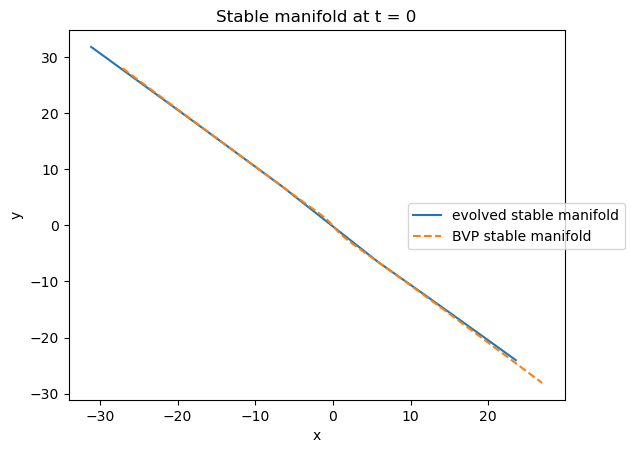

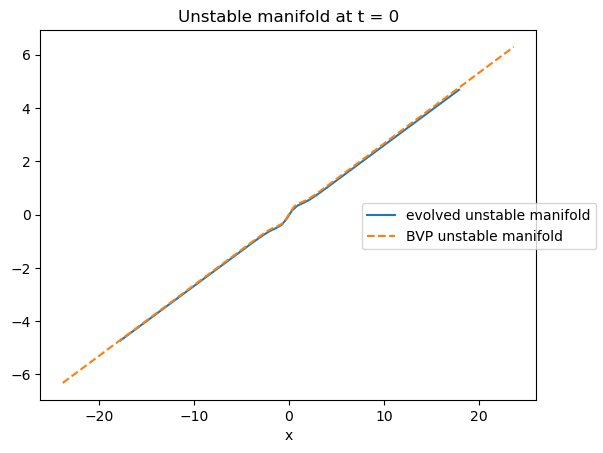

In [55]:
plt.rc('font',size=20)
fig = plt.figure()
ax =plt.subplot()
q = np.linspace(np.amin(stableCoord),np.amax(stableCoord),100)

p_bvp =  np.vstack((xSM(q,t1_S),ySM(q,t1_S))).T
plt.plot(p_S[:,0],p_S[:,1], label = 'evolved stable manifold')
plt.plot(p_bvp[:,0],p_bvp[:,1],label = 'BVP stable manifold',linestyle= 'dashed')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Stable manifold at t = 0')
fig.legend(loc ='right' )
plt.show()


fig = plt.figure()
ax =plt.subplot()
q = np.linspace(np.amin(unstableCoord),np.amax(unstableCoord),100)

p_bvp =  np.vstack((xUM(q,t1_U),yUM(q,t1_U))).T
plt.plot(p_U[:,0],p_U[:,1], label = 'evolved unstable manifold')
plt.plot(p_bvp[:,0],p_bvp[:,1],label = 'BVP unstable manifold',linestyle= 'dashed')
ax.set_xlabel('x')
ax.set_label('y')
plt.title('Unstable manifold at t = 0')
fig.legend(loc ='right' )
plt.savefig()
plt.show()


## Plots
----

In [289]:
def add_points(p0,ind):
    n = len(p0)
    m = len(ind)
    p0_interp = np.zeros((m,2))
    t,n,mu,beta,gamma = Dritschel_interp(p0)
    for i in range(0,m):
        j = ind[i]
        s = 1/2
        p0_interp[i] = p0[j] + s*t[j] + (mu[j]*s + beta[j]*s**2 + gamma[j]*s**3)*n[j]
    return p0_interp

In [290]:
def Dritschel_interp(x):
    m = len(x)
    xplus1 = x[1:]
    x = x[0:-1]

    t = xplus1 - x
    a = t[:,0]
    b = t[:,1]
    n = np.vstack((-b,a)).T

    d = np.linalg.norm(t,axis = 1)
    kappa= 2*(a[0:-1]*b[1:] - b[0:-1]+a[1:])/np.linalg.norm(d[0:-1]**2*t[1:].T + d[1:]**2*t[0:-1].T ,axis = 0) # kappa[0] corresponds to j = 1
    d = d[1:-1]  # now kappa and d indices match
    kappaplus1 = kappa[1:]
    kappa = kappa[0:-1]
    mu = -d*kappa/3 -d*kappaplus1/6
    beta = d*kappa/2
    gamma = d*(kappaplus1 - kappa)/6

    mu_full = np.zeros(m-1)
    beta_full = np.zeros(m-1)
    gamma_full = np.zeros(m-1)

    mu_full[1:-1] = mu
    beta_full[1:-1] = beta
    gamma_full[1:-1] = gamma

    return t,n,mu_full,beta_full,gamma_full

This plot shows the hyperbolic trajectory alongside the stable and unstable manifolds and sample transition and non-transition trajectories.

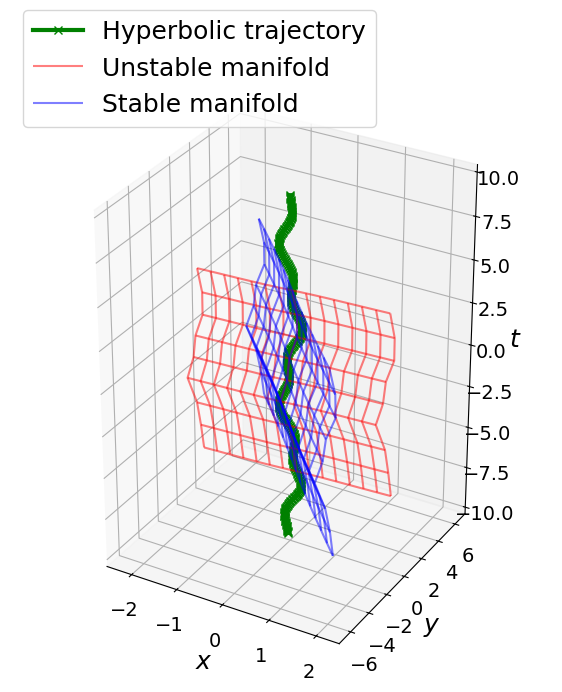

In [22]:
fig = plt.figure(figsize=(7,9))
ax = fig.add_subplot(projection='3d')
ax.plot(Xhyp[:,0], Xhyp[:,1], t,linestyle='-',  linewidth=3, marker='x',color = 'green', label="Hyperbolic trajectory")
stableCoordinterp = np.linspace(stableCoord[0]+0.1,stableCoord[-1]-0.1,15)
unstableCoordinterp = np.linspace(unstableCoord[0]+0.1,unstableCoord[-1]-0.1,15)
tinterp = np.linspace(-6, 6, 10)
FontSize = 18
XS = 0*np.zeros((len(stableCoordinterp),len(tinterp)))
YS = 0*np.zeros((len(stableCoordinterp),len(tinterp)))
tS = 0*np.zeros((len(stableCoordinterp),len(tinterp)))
for i in range(0,len(stableCoordinterp)):
    for j in range(0,len(tinterp)):
        XS[i,j] = xSM(stableCoordinterp[i],tinterp[j])
        YS[i,j] = ySM(stableCoordinterp[i],tinterp[j])
        tS[i,j] = tinterp[j]
        
XU = 0*np.zeros((len(unstableCoordinterp),len(tinterp)))
YU = 0*np.zeros((len(unstableCoordinterp),len(tinterp)))
tU = 0*np.zeros((len(unstableCoordinterp),len(tinterp)))
for i in range(0,len(unstableCoordinterp)):
    for j in range(0,len(tinterp)):
        XU[i,j] = xUM(unstableCoordinterp[i],tinterp[j])
        YU[i,j] = yUM(unstableCoordinterp[i],tinterp[j])
        tU[i,j] = tinterp[j]
ax.plot_wireframe(XU, YU, tU, color = 'red',label = 'Unstable manifold',alpha = 0.5)
ax.plot_wireframe(XS, YS, tS, color = 'blue',label = 'Stable manifold',alpha = 0.5)
y0 = np.array([-2,3])
res = solve_ivp (f, [-3,3], y0 , method = "RK45" ,max_step =0.05 , rtol = 1e-8 )
y1 = res .y. transpose()
t1 = res .t  
#ax.plot(y1[:,0],y1[:,1],t1, color = 'black', linewidth=3,label = 'Transition trajectory')

y0 = np.array([-2,1])
res = solve_ivp (f, [-3,3], y0 , method = "RK45" ,max_step =0.05 , rtol = 1e-8 )
y2 = res .y. transpose()
t2 = res .t  
#ax.plot(y2[:,0],y2[:,1],t2, color = 'brown', linewidth=3,label = 'Non-transition trajectory')

ax.set_xlabel("$x$", fontsize=FontSize)
plt.legend(fontsize=FontSize,bbox_to_anchor=(-0, 1.2), loc='upper left')
ax.set_ylabel("$y$", fontsize=FontSize)
ax.set_zlabel("$t$", fontsize=FontSize)
ax.zaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_box_aspect((1, 1, 1.5))
plt.show()

Time slice in original coordinates.

<Figure size 1500x1500 with 0 Axes>

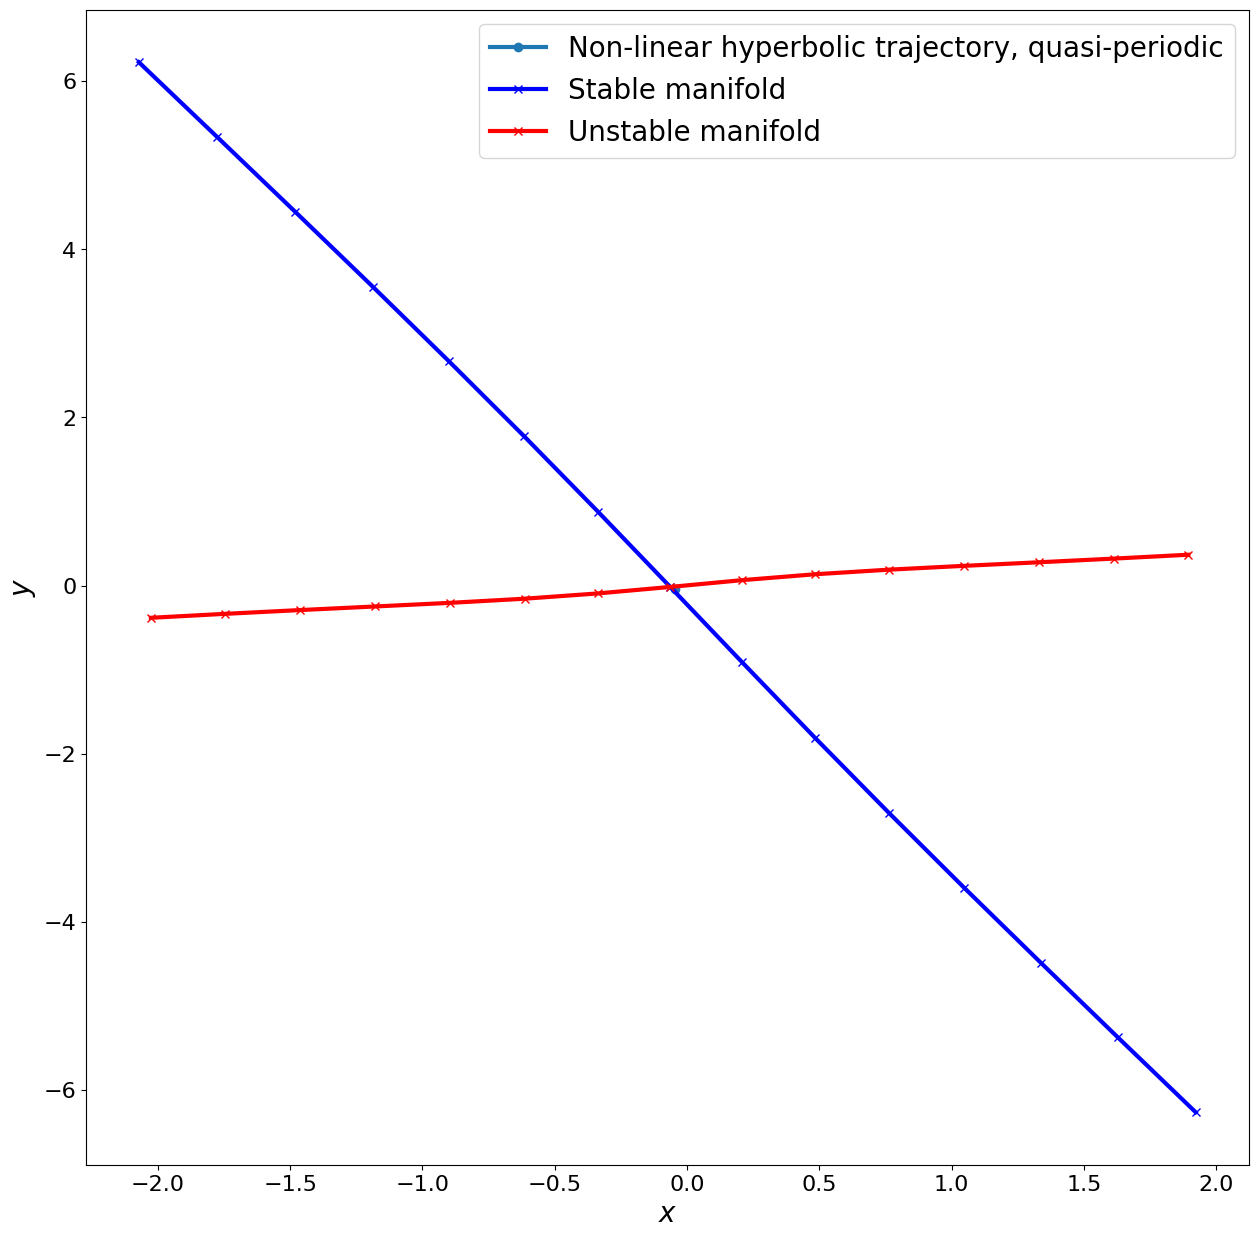

In [23]:
N = len(t)
fig = plt.figure(figsize=(15,15))
J =N//2
fig = plt.figure(figsize=(15,15))
FontSize = 20
plt.plot(Xhyp[J,0],Xhyp[J,0], linewidth=3, marker='o', label="Non-linear hyperbolic trajectory, quasi-periodic")
stableCoordinterp = np.linspace(stableCoord[0]+0.1,stableCoord[-1]-0.1,15)
unstableCoordinterp = np.linspace(unstableCoord[0]+0.1,unstableCoord[-1]-0.1,15)
YSvals =0*stableCoordinterp
XSvals =0*stableCoordinterp
for i in range(0,len(stableCoordinterp)):
    YSvals[i] = ySM(stableCoordinterp[i],t[J])
    XSvals[i] =xSM(stableCoordinterp[i],t[J])
plt.plot(XSvals,YSvals, color = 'blue', linewidth=3, marker='x',label = 'Stable manifold')
YUvals =0*unstableCoordinterp
XUvals =0*unstableCoordinterp
for i in range(0,len(unstableCoordinterp)):
    YUvals[i] = yUM(unstableCoordinterp[i],t[J])
    XUvals[i] =xUM(unstableCoordinterp[i],t[J])
plt.plot(XUvals,YUvals,color = 'red', linewidth=3, marker='x',label = 'Unstable manifold')
plt.legend(fontsize=FontSize)
plt.xlabel("$x$", fontsize=FontSize)
    #plt.xlim(-1, 1)
    #plt.ylim(-1, 1)
plt.ylabel("$y$", fontsize=FontSize)
plt.show()

# Heat map
----


This is an interpolation of the hyperbolic trajectory.

In [24]:
xhyp = lambda s: np.interp(s,t,Xhyp[:,0])
yhyp = lambda s: np.interp(s,t,Xhyp[:,1])

Load saved data

In [25]:
x = np.load(SaveFile + "initial conditions.npy")
z = np.load(SaveFile +"Points moving over.npy")

Construct new data
# Do not run if data already available!
----

In [ ]:
def event(s,y):
    #return (Minv.dot(y) - np.array([xhyp(s),yhyp(s)]))[0]
    return y[0]- xhyp(s)
event.terminal = True
# functions to determine if it passes over
def passOver(y0):
    if event(0,y0) < 0:
        res = solve_ivp (f, [0,100], y0 , method = "RK45" , events=[event],max_step =0.05 , rtol = 1e-8 )
        y = res .y. transpose()
        t = res .t  
        s = t[-1]
        if s<100 and y[-1][1] > yhyp(s):  # the trajectories which move left to right
            return s
        elif y[-1][0]- xhyp(s) < 0: # trajectories which stay on left
            return -1
    else: 
        res = solve_ivp (f, [0,100], y0 , method = "RK45" , events=[event],max_step =0.05 , rtol = 1e-8 )
        y = res .y. transpose()
        t = res .t  
        s = t[-1]
        if s<100 and y[-1][1] < yhyp(s):  # the trajectories which move right to left 
            return -1
        elif y[-1][0]- xhyp(s) > 0: # trajectories which stay on right
            return 0



#creating and storing the data.

x = np.meshgrid(np.linspace(-3,xhyp(0)+.5,150) , np.linspace(yhyp(0)-0.5,3,150),indexing= 'ij')
z = np.zeros((np.shape(x)[1],np.shape(x)[2]))
count = 0
for i in range(0,np.shape(x)[1]):
    for j in range(0,np.shape(x)[2]):
        y0 = np.array([x[0][i,j],x[1][i,j]])
        z[i,j] = passOver(y0)
        count+=1
        if int(100000*count/(np.shape(x)[1]*np.shape(x)[2])) % 5 == 0:
            print(str(100*count/(np.shape(x)[1]*np.shape(x)[2])) + "% complete")
np.save("initial conditions.npy" , x)
np.save("Points moving over.npy", z)

Produce plots, heat map of which points transition and time to transition.

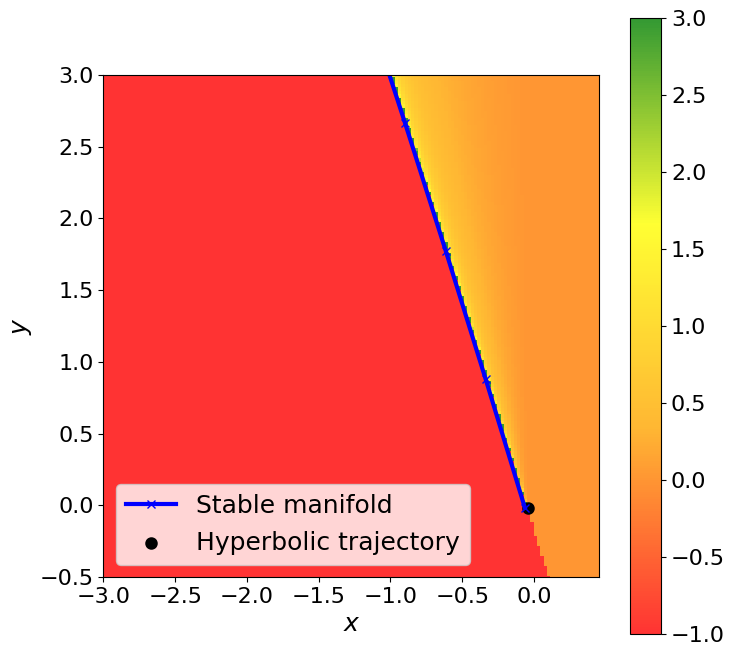

In [28]:
X,Y = x
plt.rc('font',size=22)
YSvals =0*stableCoordinterp
XSvals =0*stableCoordinterp
for i in range(0,len(stableCoordinterp)):
    YSvals[i] = ySM(stableCoordinterp[i],0)
    XSvals[i] =xSM(stableCoordinterp[i],0)
YUvals =0*unstableCoordinterp
XUvals =0*unstableCoordinterp
for i in range(0,len(unstableCoordinterp)):
    YUvals[i] = yUM(unstableCoordinterp[i],0)
    XUvals[i] =xUM(unstableCoordinterp[i],0)

fig = plt.figure(figsize=(8,8))
plt.xlabel("$x$", fontsize=18)
    #plt.xlim(-1, 1)
    #plt.ylim(-1, 1)
plt.ylabel("$y$", fontsize=18)
import matplotlib.colors
custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom",["red","orange","yellow","green"])
plt.imshow(z.transpose(), vmin = -1,vmax = 3, cmap = custom_cmap, origin = 'lower',alpha = .8,extent = [np.amin(X),np.amax(X),np.amin(Y),np.amax(Y)])
plt.colorbar()
plt.plot(XSvals[0:XSvals.shape[0]//2+1],YSvals[0:XSvals.shape[0]//2+1], color = 'blue', linewidth=3, marker='x',label = 'Stable manifold')
plt.scatter(xhyp(0),yhyp(0), linewidth=3, marker='o', color = 'black', label="Hyperbolic trajectory")
plt.legend(fontsize=18)

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

plt.ylim(-.5,3)
plt.savefig(f'k={k} data/heatmap_k{k}.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
X,Y = x
ax.plot_surface(X,Y,z)
plt.show()